# Matheus Araujo Pinheiro
# Katlyn Ribeiro

In [1]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import itertools
import time
import math
import pandas as pd
import datetime
import pytz
import matplotlib.image as mpimg
import os
import urllib.request
import io

# Configurações de Interface e Gráfico

In [2]:
def plotar_pixel(x, y, cor, ax, tamanho_pixel=100):
    """Plota um único pixel no gráfico."""
    ax.scatter(x, y, color=cor, s=tamanho_pixel, zorder=3)

In [3]:
def configurar_grafico(ax, titulo, x_label, y_label):
    """Configura os elementos visuais do gráfico."""
    ax.set_title(titulo, fontsize=15)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True, which='both', linestyle=':', alpha=0.5)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal', adjustable='box')

In [4]:
def plotar_pontos_circulo(xc, yc, x, y, ax, cor, tamanho_pixel=100):
    """Usa simetria de 8 para plotar os pixels do círculo."""
    plotar_pixel(xc + x, yc + y, cor, ax, tamanho_pixel)
    plotar_pixel(xc - x, yc + y, cor, ax, tamanho_pixel)
    plotar_pixel(xc + x, yc - y, cor, ax, tamanho_pixel)
    plotar_pixel(xc - x, yc - y, cor, ax, tamanho_pixel)
    plotar_pixel(xc + y, yc + x, cor, ax, tamanho_pixel)
    plotar_pixel(xc - y, yc + x, cor, ax, tamanho_pixel)
    plotar_pixel(xc + y, yc - x, cor, ax, tamanho_pixel)
    plotar_pixel(xc - y, yc - x, cor, ax, tamanho_pixel)

# Algoritmos de Ponto-Médio

In [5]:
def algoritmo_ponto_medio_linha(x1, y1, x2, y2, ax, cor_linha='red'):
    """
    Algoritmo do Ponto Médio para traçar uma linha.
    Retorna uma lista de tuplas (x, y) dos pixels plotados.
    """
    points = []
    
    # Plota os pontos inicial e final da linha
    plotar_pixel(x1, y1, 'green', ax)
    plotar_pixel(x2, y2, 'blue', ax)
    points.append((x1, y1))

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    if dx == 0:
        for y in range(y1 + sy, y2 + sy, sy):
            plotar_pixel(x1, y, cor_linha, ax)
            points.append((x1, y))
        return points
    
    if dy == 0:
        for x in range(x1 + sx, x2 + sx, sx):
            plotar_pixel(x, y1, cor_linha, ax)
            points.append((x, y1))
        return points

    if dy <= dx:
        d = 2 * dy - dx
        inc_E = 2 * dy
        inc_NE = 2 * (dy - dx)
        x, y = x1, y1

        while x != x2:
            x += sx
            if d < 0:
                d += inc_E
            else:
                y += sy
                d += inc_NE
            plotar_pixel(x, y, cor_linha, ax)
            points.append((x, y))
            
    else:
        d = 2 * dx - dy
        inc_E = 2 * dx
        inc_NE = 2 * (dx - dy)
        x, y = x1, y1

        while y != y2:
            y += sy
            if d < 0:
                d += inc_E
            else:
                x += sx
                d += inc_NE
            plotar_pixel(x, y, cor_linha, ax)
            points.append((x, y))

    return points

In [6]:
def algoritmo_ponto_medio_circulo(xc, yc, r, ax, cor_circulo='red'):
    """
    Algoritmo do Ponto Médio para traçar um círculo.
    
    Parâmetros:
    - xc, yc: coordenadas do centro do círculo.
    - r: raio do círculo.
    - ax: eixo/área de desenho (ex.: matplotlib).
    - cor_circulo: cor dos pontos da borda do círculo.
    
    Retorna:
    - Lista com todas as coordenadas (x, y) dos pixels plotados.
    """
    points = []

    # Começamos do ponto (0, r), no topo do círculo
    x = 0
    y = r

    # Parâmetro de decisão inicial (define se próximo ponto é E ou SE)
    d = 1 - r

    # Primeiro conjunto de pontos simétricos (8 simetrias do círculo)
    plotar_pontos_circulo(xc, yc, x, y, ax, cor_circulo)
    points.extend([
        (xc + x, yc + y), (xc - x, yc + y),
        (xc + x, yc - y), (xc - x, yc - y),
        (xc + y, yc + x), (xc - y, yc + x),
        (xc + y, yc - x), (xc - y, yc - x)
    ])

    # Laço percorre apenas o primeiro octante do círculo
    while y > x:
        if d < 0:
            # Caso o ponto médio esteja dentro do círculo → escolhe pixel Leste (E)
            d = d + 2 * x + 3
        else:
            # Caso o ponto médio esteja fora do círculo → escolhe pixel Sudeste (SE)
            d = d + 2 * (x - y) + 5
            y -= 1  # Move uma linha para cima
        x += 1      # Sempre anda uma coluna para frente

        # Plota os 8 pontos simétricos correspondentes a (x, y)
        plotar_pontos_circulo(xc, yc, x, y, ax, cor_circulo)
        points.extend([
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y),
            (xc + y, yc + x), (xc - y, yc + x),
            (xc + y, yc - x), (xc - y, yc - x)
        ])

    return points

In [7]:
def algoritmo_polar_circulo(xc, yc, r, ax, cor_circulo='blue'):
    """
    Algoritmo de círculo usando coordenadas polares.
    
    Parâmetros:
    - xc, yc: centro do círculo.
    - r: raio do círculo.
    - ax: eixo/área de desenho (ex.: matplotlib).
    - cor_circulo: cor dos pixels.
    
    Retorna:
    - Lista de tuplas (x, y) dos pixels plotados.
    """

    points = []

    # Número aproximado de pontos no círculo, proporcional ao perímetro
    num_pontos = int(2 * math.pi * r)

    # Loop para cada ponto, variando o ângulo de 0 a 2*pi
    for i in range(num_pontos):
        angulo = 2 * math.pi * i / num_pontos  # ângulo atual em radianos
        x = int(round(r * math.cos(angulo)))   # coordenada x no círculo
        y = int(round(r * math.sin(angulo)))   # coordenada y no círculo

        # Plota o pixel na posição correta adicionando o centro
        plotar_pixel(xc + x, yc + y, cor_circulo, ax)

        # Salva o ponto na lista
        points.append((xc + x, yc + y))
        
    return points

### Versões de Cálculo para Medição de Tempo

In [8]:
def _calcular_ponto_medio_circulo(r):
    """Versão do algoritmo Ponto Médio para medição de tempo."""
    x = 0
    y = r
    d = 1 - r
    while y > x:
        if d < 0:
            d = d + 2 * x + 3
        else:
            d = d + 2 * (x - y) + 5
            y -= 1
        x += 1

In [9]:
def _calcular_polar_circulo(r):
    """Versão do algoritmo Polar para medição de tempo."""
    num_pontos = int(2 * math.pi * r)
    for i in range(num_pontos):
        angulo = 2 * math.pi * i / num_pontos
        x = int(round(r * math.cos(angulo)))
        y = int(round(r * math.sin(angulo)))

# Lógica de Interface e Execução

In [10]:
class AppPontoMedio(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Algoritmo do Ponto Médio")
        self.geometry("1000x700")

        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=10, pady=10)
        
        self.configurar_interface()
        self.pontos_desenhados = []
        self.cores_ciclo = itertools.cycle(['red', 'green', 'blue', 'purple', 'orange'])
        self.resetar_grafico()

    def configurar_interface(self):
        frame_controle = ttk.LabelFrame(self, text="Controles de Desenho")
        frame_controle.pack(side=tk.RIGHT, fill=tk.Y, padx=10, pady=10)

        # Seleção de tipo de forma (Linha ou Círculo)
        self.tipo_forma = tk.StringVar(value="linha")
        ttk.Radiobutton(frame_controle, text="Linha", variable=self.tipo_forma, value="linha", command=self.alternar_inputs).pack(anchor=tk.W, pady=5)
        ttk.Radiobutton(frame_controle, text="Círculo", variable=self.tipo_forma, value="circulo", command=self.alternar_inputs).pack(anchor=tk.W, pady=5)

        # Frame para inputs de linha
        self.frame_linha = ttk.Frame(frame_controle)
        self.label_x1 = ttk.Label(self.frame_linha, text="X1:")
        self.label_x1.pack(anchor=tk.W, pady=2)
        self.entry_x1 = ttk.Entry(self.frame_linha)
        self.entry_x1.pack(fill=tk.X, pady=2)
        
        self.label_y1 = ttk.Label(self.frame_linha, text="Y1:")
        self.label_y1.pack(anchor=tk.W, pady=2)
        self.entry_y1 = ttk.Entry(self.frame_linha)
        self.entry_y1.pack(fill=tk.X, pady=2)
        
        self.label_x2 = ttk.Label(self.frame_linha, text="X2:")
        self.label_x2.pack(anchor=tk.W, pady=2)
        self.entry_x2 = ttk.Entry(self.frame_linha)
        self.entry_x2.pack(fill=tk.X, pady=2)
        
        self.label_y2 = ttk.Label(self.frame_linha, text="Y2:")
        self.label_y2.pack(anchor=tk.W, pady=2)
        self.entry_y2 = ttk.Entry(self.frame_linha)
        self.entry_y2.pack(fill=tk.X, pady=2)

        # Frame para inputs de círculo
        self.frame_circulo = ttk.Frame(frame_controle)
        self.label_xc = ttk.Label(self.frame_circulo, text="Centro X:")
        self.label_xc.pack(anchor=tk.W, pady=2)
        self.entry_xc = ttk.Entry(self.frame_circulo)
        self.entry_xc.pack(fill=tk.X, pady=2)
        
        self.label_yc = ttk.Label(self.frame_circulo, text="Centro Y:")
        self.label_yc.pack(anchor=tk.W, pady=2)
        self.entry_yc = ttk.Entry(self.frame_circulo)
        self.entry_yc.pack(fill=tk.X, pady=2)
        
        self.label_r = ttk.Label(self.frame_circulo, text="Raio:")
        self.label_r.pack(anchor=tk.W, pady=2)
        self.entry_r = ttk.Entry(self.frame_circulo)
        self.entry_r.pack(fill=tk.X, pady=2)
        
        self.alternar_inputs()

        # Botões de ação
        ttk.Button(frame_controle, text="Desenhar", command=self.desenhar_forma).pack(fill=tk.X, pady=10)
        ttk.Button(frame_controle, text="Limpar Gráfico", command=self.resetar_grafico).pack(fill=tk.X, pady=5)
        
    def alternar_inputs(self):
        """Alterna a visibilidade dos campos de entrada."""
        if self.tipo_forma.get() == "linha":
            self.frame_circulo.pack_forget()
            self.frame_linha.pack(fill=tk.X)
        else:
            self.frame_linha.pack_forget()
            self.frame_circulo.pack(fill=tk.X)

    def desenhar_forma(self):
        """Obtém os dados da interface e chama o algoritmo de desenho."""
        try:
            cor_atual = next(self.cores_ciclo)
            
            if self.tipo_forma.get() == "linha":
                x1 = int(self.entry_x1.get())
                y1 = int(self.entry_y1.get())
                x2 = int(self.entry_x2.get())
                y2 = int(self.entry_y2.get())
                
                # Coletar pontos de referência
                self.pontos_desenhados.extend([(x1, y1), (x2, y2)])

                # Chama o algoritmo e coleta os pontos plotados
                novos_pontos = algoritmo_ponto_medio_linha(x1, y1, x2, y2, self.ax, cor_linha=cor_atual)
                
                # Plotar a linha de referência com um rótulo
                self.ax.plot([x1, x2], [y1, y2], '--', color=cor_atual, linewidth=1, label=f'Linha de Referência {len(self.pontos_desenhados)//2}', zorder=1)

            else: # Círculo
                xc = int(self.entry_xc.get())
                yc = int(self.entry_yc.get())
                r = int(self.entry_r.get())
                
                # Coletar pontos de referência (extremos do círculo)
                self.pontos_desenhados.extend([(xc-r, yc-r), (xc+r, yc+r), (xc-r, yc+r), (xc+r, yc-r)])
                
                # Chama o algoritmo e coleta os pontos plotados
                novos_pontos = algoritmo_ponto_medio_circulo(xc, yc, r, self.ax, cor_circulo=cor_atual)
            
                # Plotar o círculo de referência com um rótulo
                circulo_ref = plt.Circle((xc, yc), r, color=cor_atual, fill=False, linestyle='--', linewidth=1, label=f'Círculo de Referência {len(self.pontos_desenhados)//4}')
                self.ax.add_artist(circulo_ref)

            # Adiciona os novos pontos à lista total
            self.pontos_desenhados.extend(novos_pontos)

            # Redimensiona o gráfico com base em todos os pontos
            self.redimensionar_grafico()
            
            # Adiciona a legenda
            self.ax.legend()
            self.canvas.draw()
            
        except (ValueError, IndexError):
            messagebox.showerror("Erro de Entrada", "Por favor, insira valores inteiros válidos.")
    
    def redimensionar_grafico(self):
        """Ajusta os limites do gráfico para acomodar todos os pontos desenhados."""
        if not self.pontos_desenhados:
            return

        all_x = [p[0] for p in self.pontos_desenhados]
        all_y = [p[1] for p in self.pontos_desenhados]

        min_x, max_x = min(all_x), max(all_x)
        min_y, max_y = min(all_y), max(all_y)
        
        # Adiciona uma margem de 10% aos limites
        margin_x = (max_x - min_x) * 0.1 or 2
        margin_y = (max_y - min_y) * 0.1 or 2
        
        self.ax.set_xlim(min_x - margin_x, max_x + margin_x)
        self.ax.set_ylim(min_y - margin_y, max_y + margin_y)
        self.canvas.draw()
    
    def resetar_grafico(self):
        """Limpa e configura o gráfico para um novo desenho."""
        self.ax.clear()
        configurar_grafico(self.ax, "Algoritmo do Ponto Médio", "X", "Y")
        self.pontos_desenhados = []
        self.ax.set_xlim(-20, 20)
        self.ax.set_ylim(-20, 20)
        self.canvas.draw()

In [11]:
def comparacao_PM_Polar(raio_inicio, raio_fim, passo):
    raios = list(range(raio_inicio, raio_fim + 1, passo))
    tempos_pm = []
    tempos_polar = []

    # Executa os algoritmos para medição de tempo
    for r in raios:
        num_execucoes = 1000
        
        inicio_pm = time.perf_counter()
        for _ in range(num_execucoes):
            _calcular_ponto_medio_circulo(r)
        fim_pm = time.perf_counter()
        tempo_medio_pm = (fim_pm - inicio_pm) / num_execucoes
        tempos_pm.append(tempo_medio_pm)

        inicio_polar = time.perf_counter()
        for _ in range(num_execucoes):
            _calcular_polar_circulo(r)
        fim_polar = time.perf_counter()
        tempo_medio_polar = (fim_polar - inicio_polar) / num_execucoes
        tempos_polar.append(tempo_medio_polar)

    # Criação da Tabela em Pandas
    tabela_dados = pd.DataFrame({
        'Raio': raios,
        'Tempo Ponto Médio (s)': tempos_pm,
        'Tempo Polar (s)': tempos_polar
    })
    
    tabela_dados['Crescimento PM (%)'] = tabela_dados['Tempo Ponto Médio (s)'].pct_change() * 100
    tabela_dados['Crescimento Polar (%)'] = tabela_dados['Tempo Polar (s)'].pct_change() * 100
    
    pd.set_option('display.float_format', '{:.10f}'.format)
    
    print("--- Tabela de Comparação de Desempenho ---")
    print(tabela_dados.to_string())
    
    # Geração dos Gráficos das Circunferências (Visualização Limpa)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
    # Plota apenas o círculo com o maior raio para cada algoritmo
    raio_max = raios[-1]
    algoritmo_ponto_medio_circulo(0, 0, raio_max, ax1, 'blue')
    algoritmo_polar_circulo(0, 0, raio_max, ax2, 'red')
    
    ax1.set_title(f'Algoritmo do Ponto Médio (Raio {raio_max})')
    ax1.set_xlabel('X'); ax1.set_ylabel('Y')
    ax1.set_aspect('equal'); ax1.grid(True)
    ax1.set_xlim(-raio_max-2, raio_max+2)
    ax1.set_ylim(-raio_max-2, raio_max+2)

    ax2.set_title(f'Algoritmo Polar (Raio {raio_max})')
    ax2.set_xlabel('X'); ax2.set_ylabel('Y')
    ax2.set_aspect('equal'); ax2.grid(True)
    ax2.set_xlim(-raio_max-2, raio_max+2)
    ax2.set_ylim(-raio_max-2, raio_max+2)

    fig.suptitle('Visualização dos Círculos Gerados', fontsize=16)
    plt.tight_layout()
    plt.savefig('comparacao_circulos.png')
    
    # Geração do Gráfico de Eficiência (Escala Logarítmica)
    fig_log, ax_log = plt.subplots(figsize=(10, 6))
    
    ax_log.plot(tabela_dados['Raio'], tabela_dados['Tempo Ponto Médio (s)'], label='Ponto Médio', marker='o')
    ax_log.plot(tabela_dados['Raio'], tabela_dados['Tempo Polar (s)'], label='Polar', marker='o')
    
    ax_log.set_title('Eficiência dos Algoritmos (Escala Logarítmica)')
    ax_log.set_xlabel('Raio')
    ax_log.set_ylabel('Tempo de Execução (s)')
    ax_log.set_yscale('log')
    ax_log.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_log.legend()
    
    plt.tight_layout()

    plt.show()

# Lógica do Aplicativo de Relógio

In [12]:
def desenhar_cruz_de_malta(ax):
    """Desenha uma Cruz de Malta estilizada no fundo do relógio."""
    # Círculo central
    algoritmo_ponto_medio_circulo(0, 0, int(RAIO_RELOGIO * 0.8), ax, 'black')
    
    # Desenhando braços da cruz
    tamanhos = [0.2, 0.5]  # proporções para braços
    angulos = [0, 90, 180, 270]  # quatro direções principais
    
    for ang in angulos:
        rad = math.radians(ang)
        x_inicio = int(RAIO_RELOGIO * tamanhos[0] * math.cos(rad))
        y_inicio = int(RAIO_RELOGIO * tamanhos[0] * math.sin(rad))
        x_fim = int(RAIO_RELOGIO * tamanhos[1] * math.cos(rad))
        y_fim = int(RAIO_RELOGIO * tamanhos[1] * math.sin(rad))
        algoritmo_ponto_medio_linha(x_inicio, y_inicio, x_fim, y_fim, ax, 'red')

In [13]:
def atualizar_relogio():
    """Atualiza o relógio com horário de Brasília corrigido."""
    try:
        brasilia_tz = pytz.timezone('America/Sao_Paulo')
        agora = datetime.datetime.now(brasilia_tz)

        h = agora.hour % 12
        m = agora.minute
        s = agora.second

        # Ajusta ângulos no sentido horário (padrão de relógio)
        ang_segundo_rad = math.radians(- (s / 60.0) * 360 + 90)
        ang_minuto_rad = math.radians(- (m / 60.0) * 360 - (s / 60.0) * 6 + 90)
        ang_hora_rad = math.radians(- (h / 12.0) * 360 - (m / 60.0) * 30 + 90)

        ax.cla()

        # Desenha imagem de fundo proporcional
        if FUNDO_IMAGEM is not None:
            ax.imshow(FUNDO_IMAGEM, extent=[-RAIO_RELOGIO * 0.7, RAIO_RELOGIO * 0.7, -RAIO_RELOGIO * 0.7, RAIO_RELOGIO * 0.7], zorder=1, aspect='auto')

        # Desenha borda do relógio
        algoritmo_ponto_medio_circulo(0, 0, RAIO_RELOGIO, ax, 'black')

        # Ponteiro dos segundos
        x_seg = int(round(RAIO_RELOGIO * 0.9 * math.cos(ang_segundo_rad)))
        y_seg = int(round(RAIO_RELOGIO * 0.9 * math.sin(ang_segundo_rad)))
        algoritmo_ponto_medio_linha(0, 0, x_seg, y_seg, ax, 'maroon')

        # Ponteiro dos minutos
        x_min = int(round(RAIO_RELOGIO * 0.7 * math.cos(ang_minuto_rad)))
        y_min = int(round(RAIO_RELOGIO * 0.7 * math.sin(ang_minuto_rad)))
        algoritmo_ponto_medio_linha(0, 0, x_min, y_min, ax, 'gray')

        # Ponteiro das horas
        x_hor = int(round(RAIO_RELOGIO * 0.5 * math.cos(ang_hora_rad)))
        y_hor = int(round(RAIO_RELOGIO * 0.5 * math.sin(ang_hora_rad)))
        algoritmo_ponto_medio_linha(0, 0, x_hor, y_hor, ax, 'black')

        ax.set_aspect('equal')
        ax.set_xlim(-RAIO_RELOGIO - 1, RAIO_RELOGIO + 1)
        ax.set_ylim(-RAIO_RELOGIO - 1, RAIO_RELOGIO + 1)
        ax.axis('off')

        canvas.draw()
        janela.after(1000, atualizar_relogio)

    except Exception as e:
        print(f"Ocorreu um erro: {e}")
        janela.quit()


# Main

Digite 1 para AppPontoMedio ou 2 para Comparação de tempos: 2
--- Tabela de Comparação de Desempenho ---
    Raio  Tempo Ponto Médio (s)  Tempo Polar (s)  Crescimento PM (%)  Crescimento Polar (%)
0      5           0.0000009844     0.0000387824                 NaN                    NaN
1      7           0.0000009750     0.0000425773       -0.9548962637           9.7851087135
2      9           0.0000017168     0.0000548481       76.0820512650          28.8200519989
3     11           0.0000020453     0.0000705419       19.1344360544          28.6132062880
4     13           0.0000013330     0.0000781916      -34.8261868513          10.8441933107
5     15           0.0000026433     0.0000916075       98.2970742654          17.1577253811
6     17           0.0000042044     0.0001064919       59.0587523069          16.2480146294
7     19           0.0000033414     0.0001172018      -20.5261155238          10.0570090305
8     21           0.0000034875     0.0001350036        4.372418780

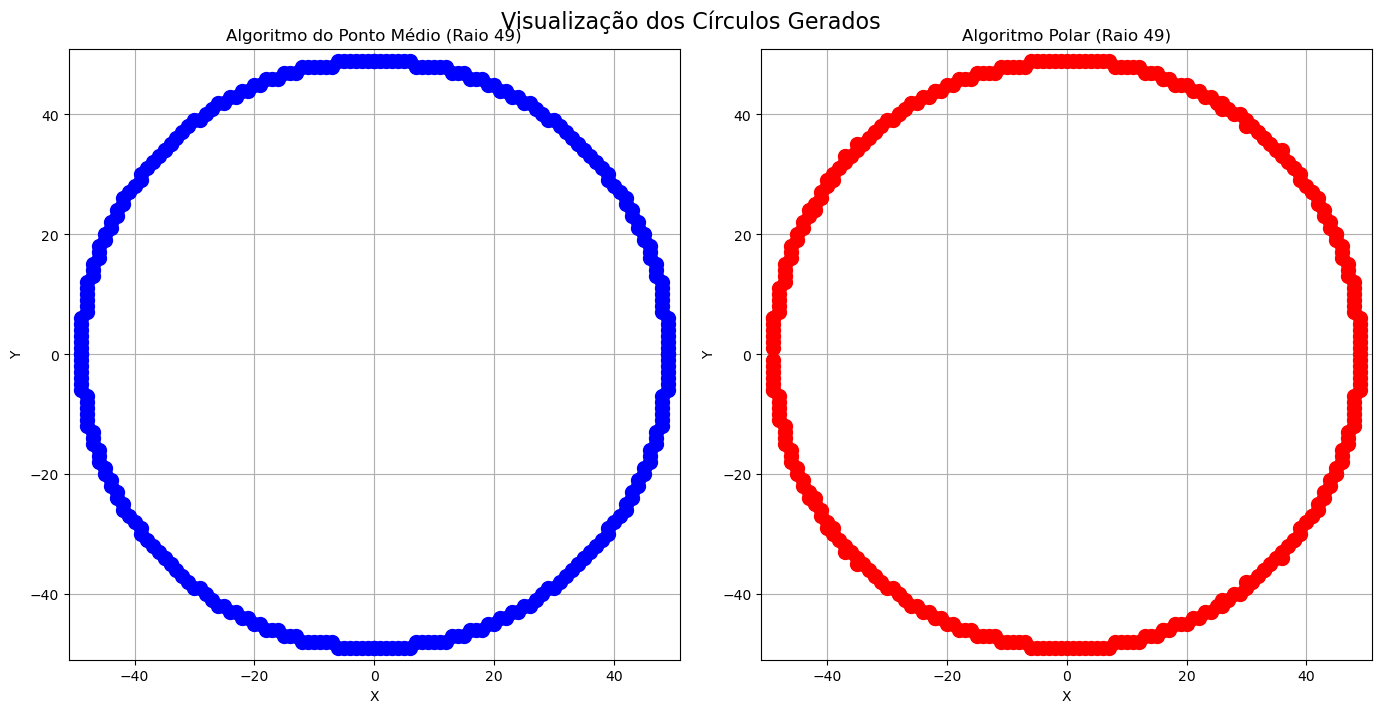

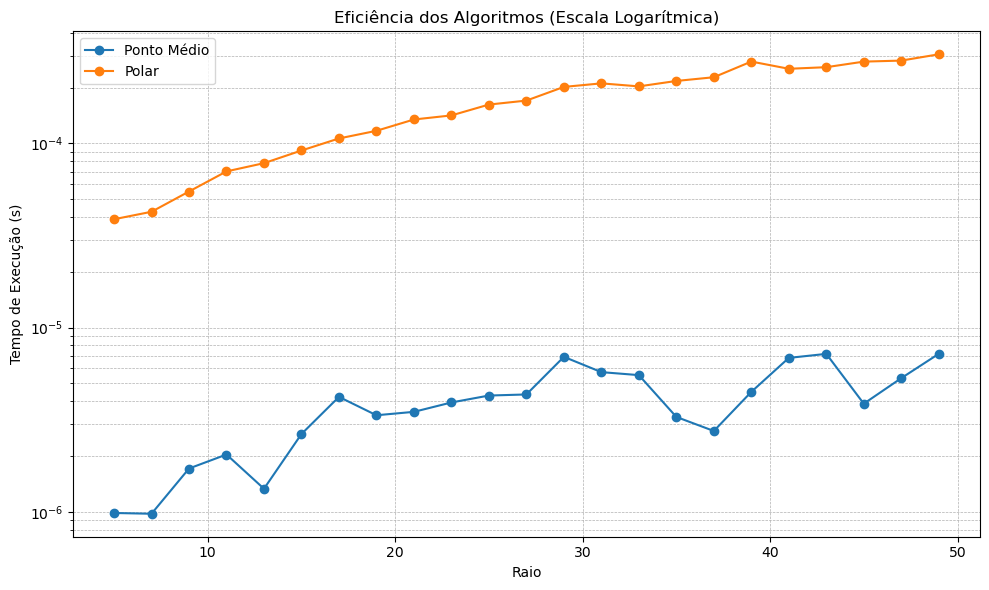

In [19]:
# --- Execução principal da aplicação ---
if __name__ == "__main__":
    escolha = input("Digite 1 para AppPontoMedio ou 2 para Comparação de tempos: ")
    if escolha == "1":
        app = AppPontoMedio()
        app.mainloop()
    else:
        comparacao_PM_Polar(5, 50, 2) #alterar valores para outras comparaçoes

# Relógio

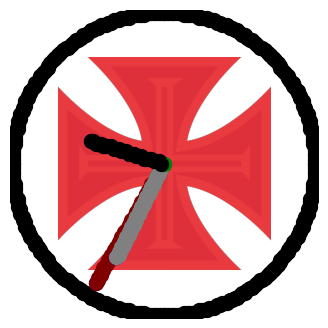

In [18]:
janela = tk.Tk()
janela.title("Relógio Analógico")
janela.geometry("400x400")

fig, ax = plt.subplots()

canvas = FigureCanvasTkAgg(fig, master=janela)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

RAIO_RELOGIO = 60

FUNDO_IMAGEM = None
image_path = 'CruzDeMalta.png'
try:
    FUNDO_IMAGEM = mpimg.imread(image_path)
except FileNotFoundError:
    print(f"Erro: O arquivo '{image_path}' não foi encontrado. Verifique se ele está no mesmo diretório do notebook.")
except Exception as e:
    print(f"Erro ao carregar a imagem local: {e}")

atualizar_relogio()

janela.mainloop()